### Exploratory Data Analysis
### ANZ synthesissed transaction dataset

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Imporing the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import scipy as sp
import IPython
import sklearn
import plotly
import missingno as msno

from pandas.plotting import scatter_matrix
import matplotlib as mpl 
import matplotlib.pylab as pylab

In [3]:
# Visualization 
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [4]:
# Loading the dataset
df = pd.read_excel("/Users/Documents_Disk/Python/ANZ_Internship/ANZ synthesised transaction dataset.xlsx" , engine="openpyxl")

In [5]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [6]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [8]:
# Size of the dataset
df.shape

(12043, 23)

In [9]:
# Droping out the dupplicates
df.drop_duplicates(inplace = True)

In [10]:
# percent of missing values in each column
missing_val = pd.DataFrame({"Column" : df.columns , "Missing Values(%)" : df.isna().mean()*100})
missing_val = missing_val.reset_index(drop = True).sort_values("Missing Values(%)" , ascending = False)
missing_val

,Column,Missing Values(%)
8,merchant_code,92.667940
2,bpay_biller_code,92.651333
14,merchant_suburb,35.921282
21,merchant_long_lat,35.921282
7,merchant_id,35.921282
1,card_present_flag,35.921282
15,merchant_state,35.921282
0,status,0.000000
20,customer_id,0.000000
19,country,0.000000


In [11]:
# Dropping out columns with more than % 90 of missing values
df.drop(columns = list(missing_val["Column"][0:2]) , axis = 1 , inplace = True)

In [12]:
# Columns
list(df.columns)

['status',
 'card_present_flag',
 'account',
 'currency',
 'long_lat',
 'txn_description',
 'merchant_id',
 'first_name',
 'balance',
 'date',
 'gender',
 'age',
 'merchant_suburb',
 'merchant_state',
 'extraction',
 'amount',
 'transaction_id',
 'country',
 'customer_id',
 'merchant_long_lat',
 'movement']

In [13]:
df.dtypes

status                       object
card_present_flag           float64
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [14]:
df["extraction"] = pd.to_datetime(df["extraction"])

In [15]:
# Adding an extraction hour column
df["Extraction Hour"] = df["extraction"].dt.hour

# Adding a extraction date column
df["Extraction date"] = df["extraction"].dt.date

In [16]:
list(df.columns)

['status',
 'card_present_flag',
 'account',
 'currency',
 'long_lat',
 'txn_description',
 'merchant_id',
 'first_name',
 'balance',
 'date',
 'gender',
 'age',
 'merchant_suburb',
 'merchant_state',
 'extraction',
 'amount',
 'transaction_id',
 'country',
 'customer_id',
 'merchant_long_lat',
 'movement',
 'Extraction Hour',
 'Extraction date']

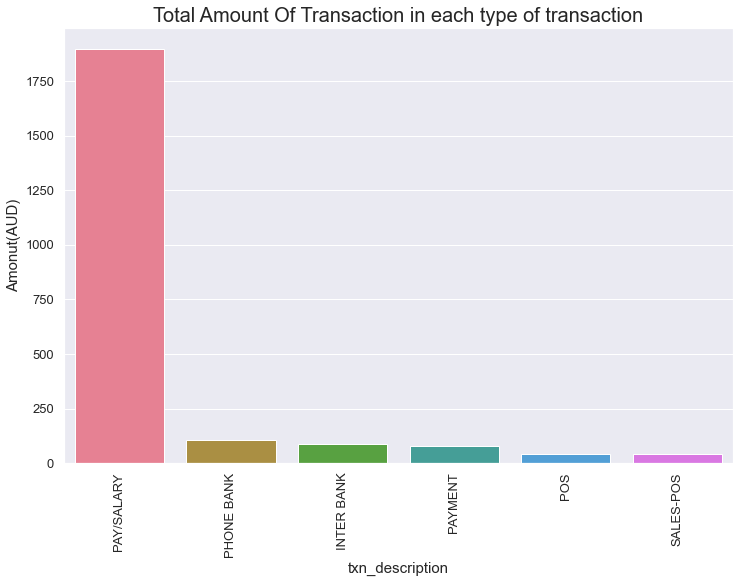

In [17]:
txn_description = pd.DataFrame({"txn_description" : df.groupby("txn_description")["amount"].sum().index , "Amount": df.groupby("txn_description")["amount"].mean().values })
txn_description = txn_description.sort_values("Amount" , ascending = False).reset_index(drop = True)
sns.set_theme(style="darkgrid" , palette = "husl")
ax = sns.barplot(x = "txn_description" , y = "Amount", data = txn_description)
plt.yticks( fontsize = 13)
plt.xticks(fontsize = 13 , rotation = "vertical")
plt.title("Total Amount Of Transaction in each type of transaction" ,  fontsize = 20)
plt.xlabel("txn_description" , fontsize = 15)
plt.ylabel("Amonut(AUD)" , fontsize = 15);

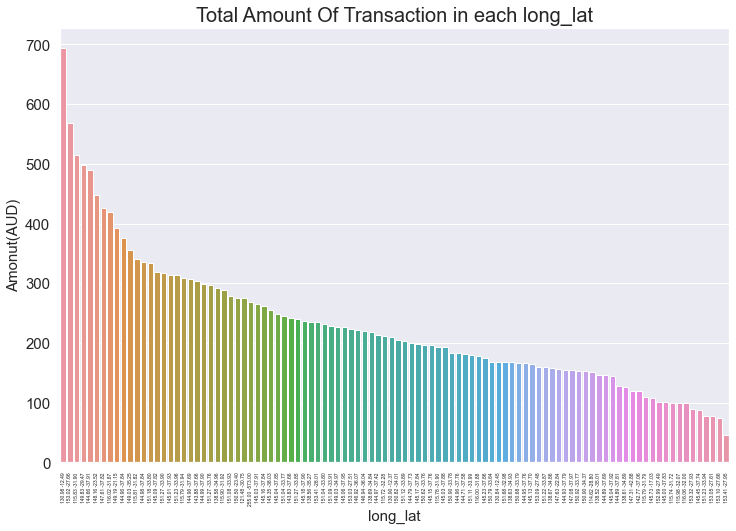

In [18]:
long_lat = pd.DataFrame({"long_lat" : df.groupby("long_lat")["amount"].sum().index , "Amount": df.groupby("long_lat")["amount"].mean().values })
long_lat = long_lat.sort_values("Amount" , ascending = False).reset_index(drop = True)
ax = sns.barplot(x = "long_lat" , y = "Amount", data = long_lat)
plt.yticks( fontsize = 15)
plt.xticks(fontsize = 5 , rotation = "vertical")
plt.title("Total Amount Of Transaction in each long_lat" ,  fontsize = 20)
plt.xlabel("long_lat" , fontsize = 15)
plt.ylabel("Amonut(AUD)" , fontsize = 15);

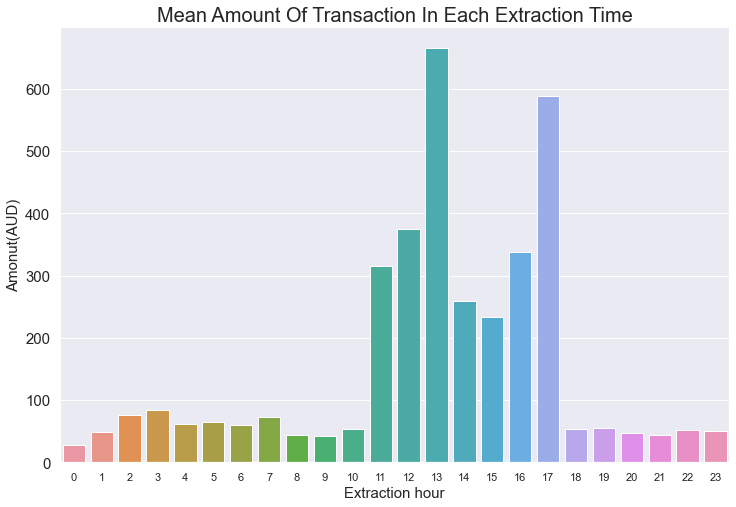

In [19]:
extraction_hour = pd.DataFrame({"Extraction hour" : df.groupby("Extraction Hour")["amount"].mean().index , "Amount": df.groupby("Extraction Hour")["amount"].mean().values })
extraction_hour = extraction_hour.sort_values("Amount" , ascending = False).reset_index(drop = True)
ax = sns.barplot(x = "Extraction hour" , y = "Amount", data = extraction_hour)
plt.yticks( fontsize = 15)
plt.title("Mean Amount Of Transaction In Each Extraction Time" ,  fontsize = 20)
plt.xlabel("Extraction hour" , fontsize = 15)
plt.ylabel("Amonut(AUD)" , fontsize = 15);

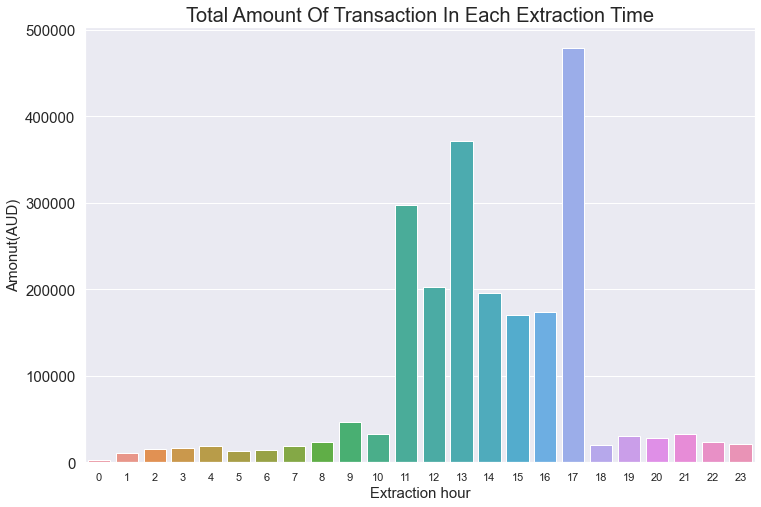

In [20]:
extraction_hour = pd.DataFrame({"Extraction hour" : df.groupby("Extraction Hour")["amount"].sum().index , "Amount": df.groupby("Extraction Hour")["amount"].sum().values })
extraction_hour = extraction_hour.sort_values("Amount" , ascending = False).reset_index(drop = True)
ax = sns.barplot(x = "Extraction hour" , y = "Amount", data = extraction_hour)
plt.yticks( fontsize = 15)
plt.title("Total Amount Of Transaction In Each Extraction Time" ,  fontsize = 20)
plt.xlabel("Extraction hour" , fontsize = 15)
plt.ylabel("Amonut(AUD)" , fontsize = 15);

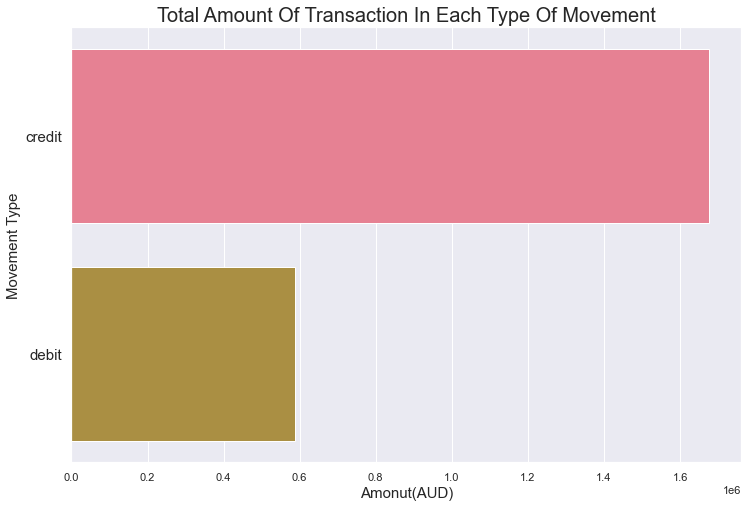

In [21]:
movement_group = pd.DataFrame({"Movement" : df.groupby("movement")["amount"].sum().index , "Amount": df.groupby("movement")["amount"].sum().values })
movement_group = movement_group.sort_values("Amount" , ascending = False).reset_index(drop = True)
ax = sns.barplot(x = "Amount" , y = "Movement", data = movement_group)
plt.yticks( fontsize = 15)
plt.title("Total Amount Of Transaction In Each Type Of Movement" ,  fontsize = 20)
plt.xlabel("Amonut(AUD)" , fontsize = 15)
plt.ylabel("Movement Type" , fontsize = 15);

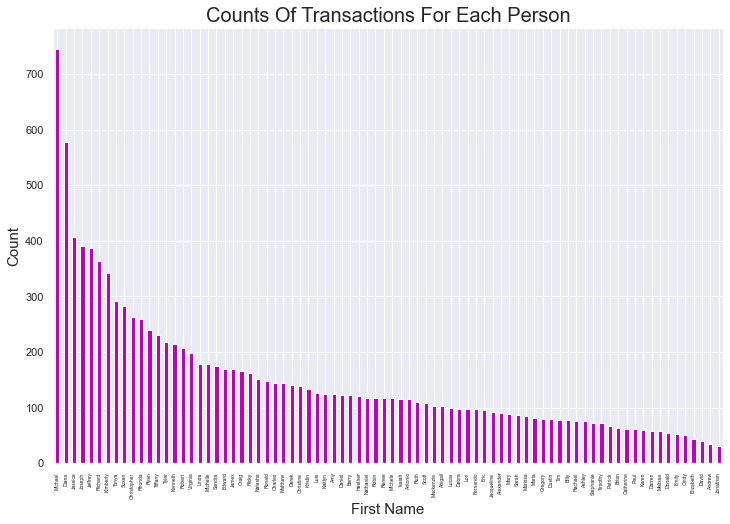

In [22]:
# Which customer has the highest counts of transactions?
sns.set_theme(style="darkgrid" , palette = "husl")
df["first_name"].value_counts().plot.bar(color = "m")
plt.xticks(rotation = "vertical" , fontsize = 5)
# plt.yticks( fontsize = 13)
plt.title("Counts Of Transactions For Each Person" ,  fontsize = 20)
plt.xlabel("First Name" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15);

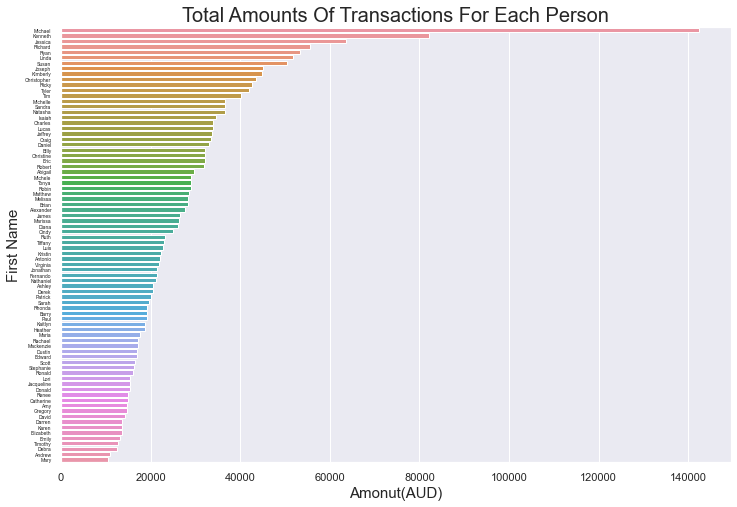

In [23]:
Name_group = pd.DataFrame({"First Name" : df.groupby("first_name")["amount"].sum().index , "Amount": df.groupby("first_name")["amount"].sum().values })
Name_group = Name_group.sort_values("Amount" , ascending = False).reset_index(drop = True)
ax = sns.barplot(x = "Amount" , y = "First Name", data=Name_group)
plt.yticks( fontsize = 5)
plt.title("Total Amounts Of Transactions For Each Person" ,  fontsize = 20)
plt.xlabel("Amonut(AUD)" , fontsize = 15)
plt.ylabel("First Name" , fontsize = 15);

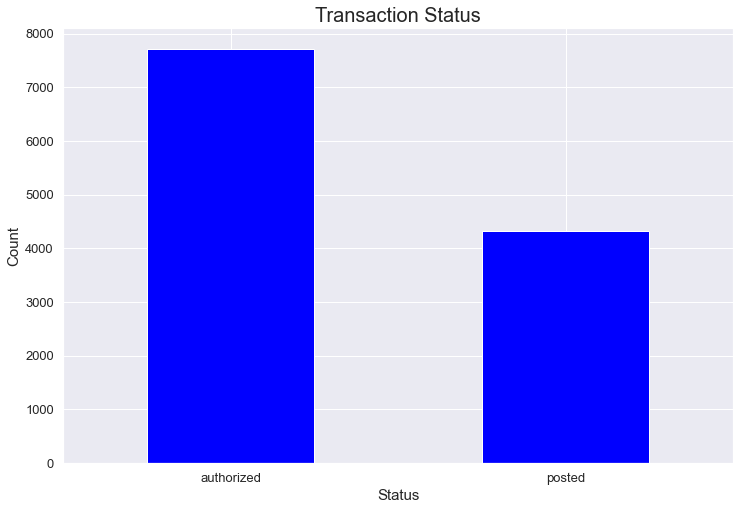

In [24]:
# Status Information
sns.set_theme(style="darkgrid" , palette = "husl")
df["status"].value_counts().plot.bar(color = "b")
plt.xticks(rotation = "horizontal" , fontsize = 13)
plt.yticks( fontsize = 13)
plt.title("Transaction Status" ,  fontsize = 20)
plt.xlabel("Status" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15);

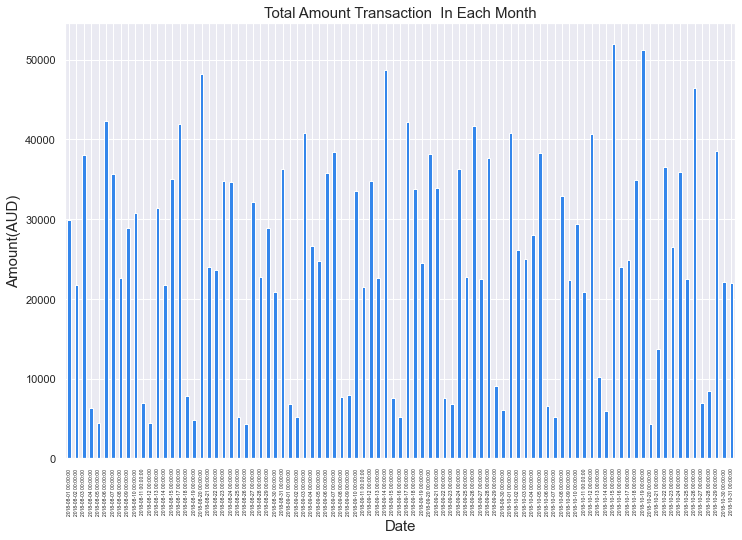

In [25]:
sns.set_theme(style="darkgrid" , palette = "husl")
df.groupby("date")["amount"].sum().plot.bar(color = "#3486eb")
plt.xticks(fontsize = 5)
plt.title("Total Amount Transaction  In Each Month" , fontsize = 15)
plt.xlabel("Date" , fontsize = 15)
plt.ylabel("Amount(AUD)" , fontsize = 15);

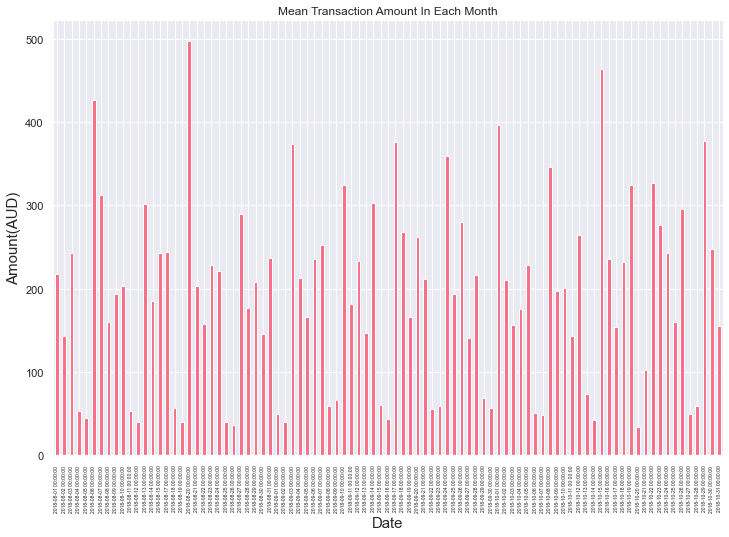

In [26]:
sns.set_theme(style="darkgrid" , palette = "husl")
df.groupby("date")["amount"].mean().plot.bar()
plt.xticks(fontsize = 5)
plt.title("Mean Transaction Amount In Each Month")
plt.xlabel("Date" , fontsize = 15)
plt.ylabel("Amount(AUD)" , fontsize = 15);

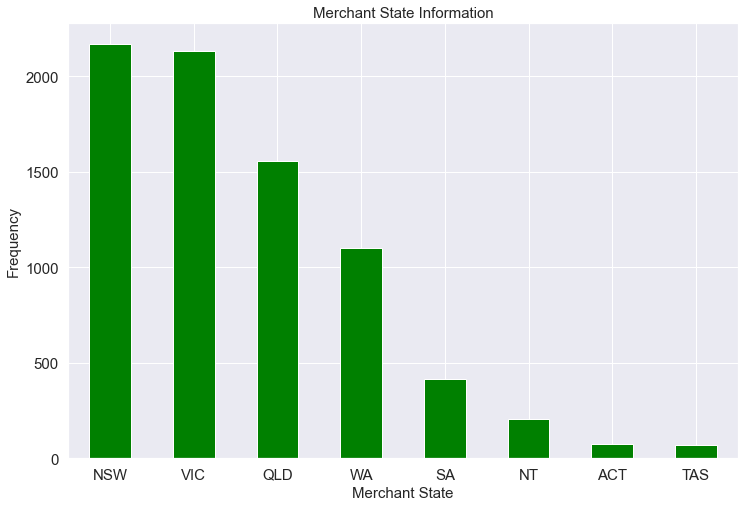

In [27]:
# Merchant State and information 
sns.set_theme(style="darkgrid" , palette = "husl")
df["merchant_state"].value_counts().plot.bar(color = "g")
plt.xticks(rotation = "horizontal" , fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Merchant State Information" , fontsize = 15)
plt.xlabel("Merchant State" , fontsize = 15)
plt.ylabel("Frequency" , fontsize = 15);

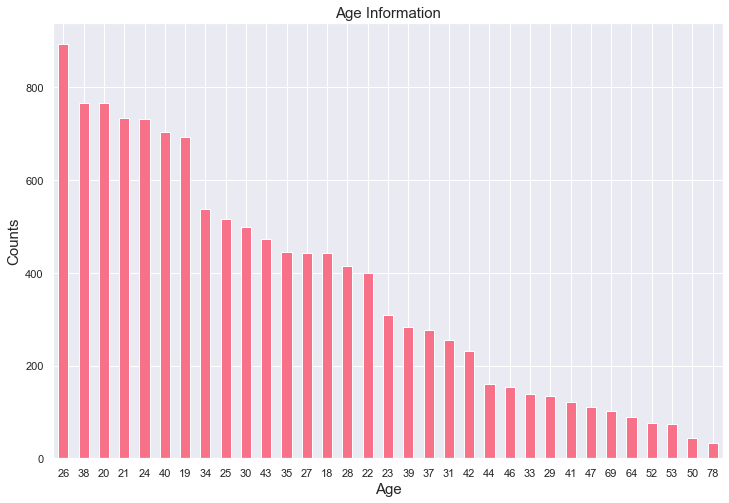

In [28]:
# Age Distribution and information 
sns.set_theme(style="darkgrid" , palette = "husl")
df["age"].value_counts().plot.bar()
plt.title("Age Information" , fontsize = 15)
plt.xticks(rotation = "horizontal")
plt.xlabel("Age" , fontsize = 15)
plt.ylabel("Counts" , fontsize = 15);

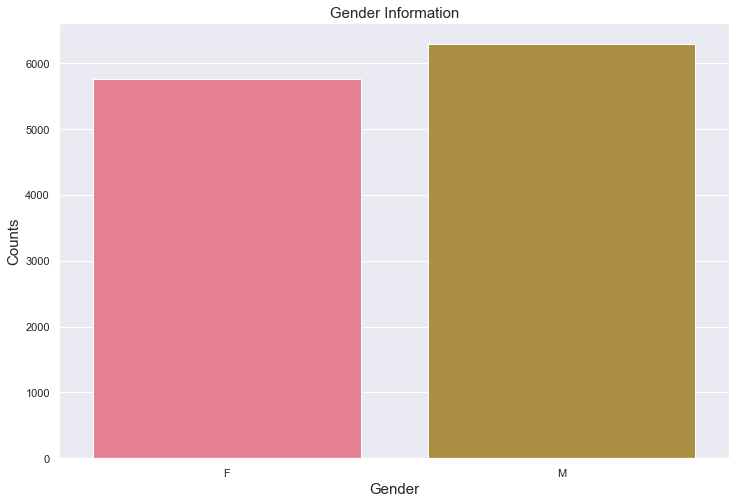

In [29]:
# Comparison of the gender type 
sns.set_theme(style="darkgrid" , palette = "husl")
ax = sns.countplot(x="gender", data=df)
plt.title("Gender Information" , fontsize = 15)
plt.xlabel("Gender" , fontsize = 15)
plt.ylabel("Counts" , fontsize = 15);


In [34]:
df.to_csv("df_cleaned.csv" , index = False)